In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [65]:
df1=pd.read_csv('/content/cement to co2.csv')

In [66]:
df1

Year     GCB    Cao     Guo       Huang
0   1959   12.68  10.21   15.16   14.876905
1   1960   13.84  11.14   16.53   16.223262
2   1961   14.72  11.84   17.61   17.257980
3   1962   15.87  12.75   18.99   18.606320
4   1963   16.87  13.55   20.19   19.757810
..   ...     ...    ...     ...         ...
58  2017  202.93    NaN  231.60  212.198095
59  2018  209.70    NaN  239.33  218.962675
60  2019  214.00    NaN  244.24  222.705199
61  2020  220.56    NaN     NaN  228.532414
62  2021  229.79    NaN     NaN  239.143572

[63 rows x 5 columns]

In [67]:
df = df1.fillna(df1.median())

In [68]:
df

Year     GCB    Cao     Guo       Huang
0   1959   12.68  10.21   15.16   14.876905
1   1960   13.84  11.14   16.53   16.223262
2   1961   14.72  11.84   17.61   17.257980
3   1962   15.87  12.75   18.99   18.606320
4   1963   16.87  13.55   20.19   19.757810
..   ...     ...    ...     ...         ...
58  2017  202.93  42.99  231.60  212.198095
59  2018  209.70  42.99  239.33  218.962675
60  2019  214.00  42.99  244.24  222.705199
61  2020  220.56  42.99   67.78  228.532414
62  2021  229.79  42.99   67.78  239.143572

[63 rows x 5 columns]

In [69]:
df_filled = df.interpolate(method='linear')

In [70]:
df_filled

Year     GCB    Cao     Guo       Huang
0   1959   12.68  10.21   15.16   14.876905
1   1960   13.84  11.14   16.53   16.223262
2   1961   14.72  11.84   17.61   17.257980
3   1962   15.87  12.75   18.99   18.606320
4   1963   16.87  13.55   20.19   19.757810
..   ...     ...    ...     ...         ...
58  2017  202.93  42.99  231.60  212.198095
59  2018  209.70  42.99  239.33  218.962675
60  2019  214.00  42.99  244.24  222.705199
61  2020  220.56  42.99   67.78  228.532414
62  2021  229.79  42.99   67.78  239.143572

[63 rows x 5 columns]

In [71]:
# Set 'Year' column as index if it's not already
df.set_index('Year', inplace=True)


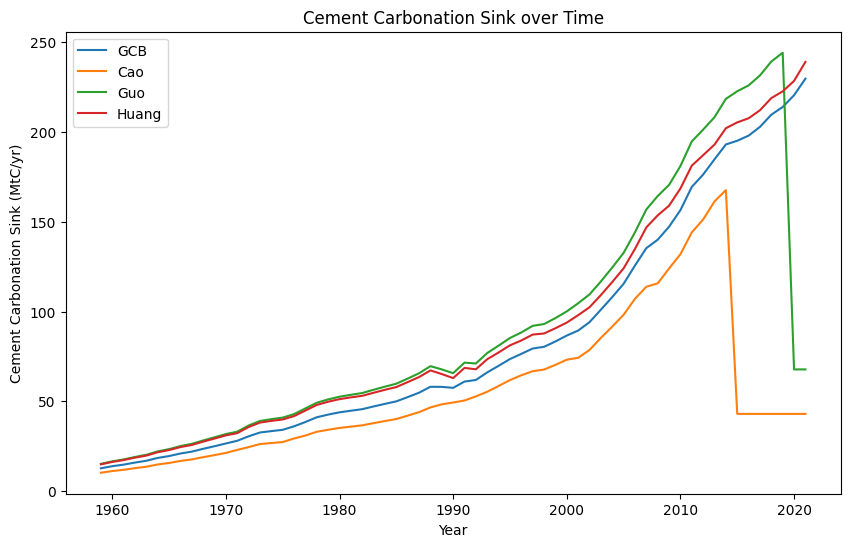

In [52]:
# Visualize the time series
df.plot(figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Cement Carbonation Sink (MtC/yr)')
plt.title('Cement Carbonation Sink over Time')
plt.legend()
plt.show()


In [55]:
method_column = 'Huang'
train_size = int(len(df) * 0.8)
train, test = df[method_column][:train_size], df[method_column][train_size:]
model = ARIMA(train, order=(5, 1, 0))  # Adjust order as needed
model_fit = model.fit()

# Forecast the next years
future_years = range(df.index.max() + 1, df.index.max() + 28)  # Forecast for the next 27 years
forecast_steps = len(future_years)
forecast = model_fit.get_forecast(steps=forecast_steps)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results w

In [56]:
forecast_values = forecast.predicted_mean
forecast_df = pd.DataFrame({'Year': future_years, 'Forecast': forecast_values.values})

# Print the forecasted values with years
print("Forecasted Values:")
print(forecast_df)

Forecasted Values:
    Year    Forecast
0   2022  162.802166
1   2023  171.292121
2   2024  179.310820
3   2025  187.409994
4   2026  195.220452
5   2027  202.851392
6   2028  210.324610
7   2029  217.611454
8   2030  224.731680
9   2031  231.686922
10  2032  238.479064
11  2033  245.113545
12  2034  251.593481
13  2035  257.922449
14  2036  264.104096
15  2037  270.141779
16  2038  276.038867
17  2039  281.798639
18  2040  287.424286
19  2041  292.918933
20  2042  298.285633
21  2043  303.527362
22  2044  308.647032
23  2045  313.647485
24  2046  318.531497
25  2047  323.301779
26  2048  327.960980


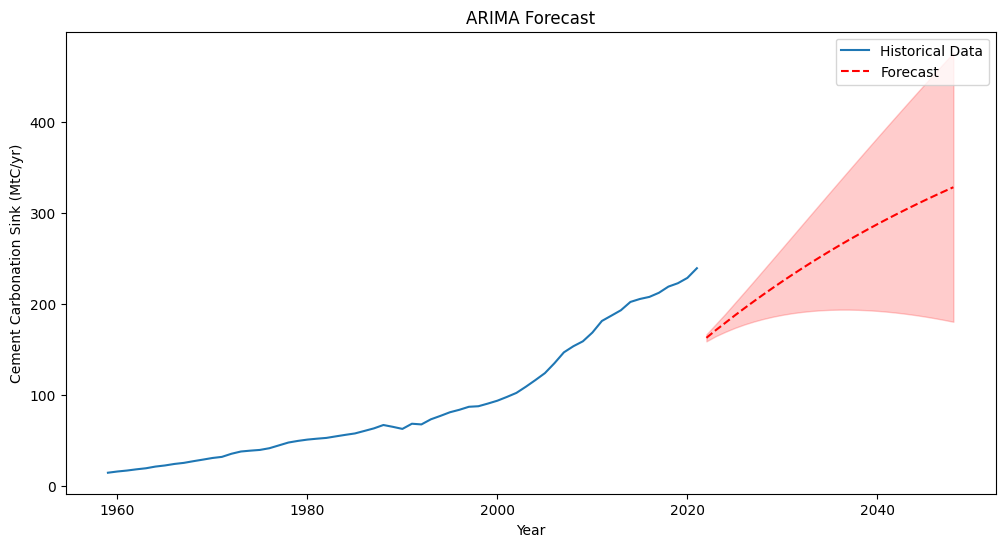

In [76]:
# Plot the original time series, the forecast, and confidence intervals (if available)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[method_column], label='Historical Data')
plt.plot(forecast_df['Year'], forecast_df['Forecast'], label='Forecast', linestyle='dashed', color='red')
#Add confidence intervals if available from the model
confidence_intervals = forecast.conf_int()
plt.fill_between(forecast_df['Year'], confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='red', alpha=0.2)
plt.xlabel('Year')
plt.ylabel('Cement Carbonation Sink (MtC/yr)')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [15]:
print("Model Summary:")
print(model_fit.summary())


Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Huang   No. Observations:                   51
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -107.133
Date:                Tue, 19 Dec 2023   AIC                            226.266
Time:                        18:49:52   BIC                            237.738
Sample:                             0   HQIC                           230.635
                                 - 51                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4623      0.130      3.559      0.000       0.208       0.717
ar.L2          0.2774      0.132      2.103      0.035       0.019       0.536
ar.L3          0.1356      0.186     

In [16]:
method_column = 'Cao'  # Replace with 'Huang' if needed
train_size = int(len(df) * 0.8)
train, test = df[method_column][:train_size], df[method_column][train_size:]
model = ARIMA(train, order=(5, 1, 0))  # Adjust order as needed
model_fit = model.fit()

# Forecast the next years
future_years = range(df.index.max() + 1, df.index.max() + 28)  # Forecast for the next 28 years
forecast_steps = len(future_years)
forecast = model_fit.get_forecast(steps=forecast_steps)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results w

In [17]:
forecast_values = forecast.predicted_mean
forecast_dfcao = pd.DataFrame({'Year': future_years, 'Forecast': forecast_values.values})

# Print the forecasted values with years
print("Forecasted Valuesforcao:")
print(forecast_dfcao)

Forecasted Valuesforcao:
    Year    Forecast
0   2023  132.482339
1   2024  135.649706
2   2025  141.751307
3   2026  149.960162
4   2027  154.198780
5   2028  158.908353
6   2029  166.179362
7   2030  171.168462
8   2031  175.228712
9   2032  181.392130
10  2033  186.696632
11  2034  190.572069
12  2035  195.745585
13  2036  200.980537
14  2037  204.875333
15  2038  209.296514
16  2039  214.206971
17  2040  218.144970
18  2041  222.056131
19  2042  226.524479
20  2043  230.436544
21  2044  234.024628
22  2045  238.038479
23  2046  241.830723
24  2047  245.210694
25  2048  248.818962
26  2049  252.413595


In [18]:
method_column = 'GCB'
train_size = int(len(df) * 0.8)
train, test = df[method_column][:train_size], df[method_column][train_size:]
model = ARIMA(train, order=(5, 1, 0))  # Adjust order as needed
model_fit = model.fit()

# Forecast the next years
future_years = range(df.index.max() + 1, df.index.max() + 28)  # Forecast for the next 28 years
forecast_steps = len(future_years)
forecast = model_fit.get_forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results w

In [21]:
forecast_values = forecast.predicted_mean
forecast_dfgcb = pd.DataFrame({'Year': future_years, 'Forecast': forecast_values.values})

# Print the forecasted values with years
print("Forecasted Valuesforgcb:")
print(forecast_dfgcb)

Forecasted Valuesforgcb:
    Year    Forecast
0   2023  154.405733
1   2024  160.285627
2   2025  166.355824
3   2026  172.445330
4   2027  178.111890
5   2028  183.636326
6   2029  189.065159
7   2030  194.283994
8   2031  199.336737
9   2032  204.255048
10  2033  209.017139
11  2034  213.629652
12  2035  218.105885
13  2036  222.445346
14  2037  226.651074
15  2038  230.729375
16  2039  234.683544
17  2040  238.516807
18  2041  242.233320
19  2042  245.836636
20  2043  249.330033
21  2044  252.716942
22  2045  256.000638
23  2046  259.184223
24  2047  262.270758
25  2048  265.263214
26  2049  268.164450


In [22]:
method_column = 'Guo'  # Replace with 'Huang' if needed
train_size = int(len(df) * 0.8)
train, test = df[method_column][:train_size], df[method_column][train_size:]
model = ARIMA(train, order=(5, 1, 0))  # Adjust order as needed
model_fit = model.fit()

# Forecast the next years
future_years = range(df.index.max() + 1, df.index.max() + 28)  # Forecast for the next 28 years
forecast_steps = len(future_years)
forecast = model_fit.get_forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results w

In [24]:
forecast_values = forecast.predicted_mean
forecast_dfguo = pd.DataFrame({'Year': future_years, 'Forecast': forecast_values.values})

# Print the forecasted values with years
print("Forecasted Valuesforguo:")
print(forecast_dfguo)

Forecasted Valuesforguo:
    Year    Forecast
0   2023  177.922746
1   2024  184.805415
2   2025  191.557571
3   2026  198.079229
4   2027  204.355917
5   2028  210.471791
6   2029  216.392069
7   2030  222.131502
8   2031  227.696305
9   2032  233.088833
10  2033  238.316792
11  2034  243.384281
12  2035  248.296317
13  2036  253.057804
14  2037  257.673228
15  2038  262.147135
16  2039  266.483848
17  2040  270.687571
18  2041  274.762388
19  2042  278.712247
20  2043  282.540984
21  2044  286.252310
22  2045  289.849828
23  2046  293.337026
24  2047  296.717288
25  2048  299.993893
26  2049  303.170020


<ipython-input-38-a35415181ad8>:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Forecast_Huang'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, forecast_dfgcb, on='Year', suffixes=('_Huang', '_gcb'))


In [39]:
merged_df

Year  Forecast_Huang  Forecast_cao  Forecast_Huang  Forecast_gcb
0   2023      165.490556    154.405733      177.922746    177.922746
1   2024      171.529296    160.285627      184.805415    184.805415
2   2025      177.402558    166.355824      191.557571    191.557571
3   2026      183.017929    172.445330      198.079229    198.079229
4   2027      188.389818    178.111890      204.355917    204.355917
5   2028      193.580762    183.636326      210.471791    210.471791
6   2029      198.567056    189.065159      216.392069    216.392069
7   2030      203.364125    194.283994      222.131502    222.131502
8   2031      207.978272    199.336737      227.696305    227.696305
9   2032      212.415394    204.255048      233.088833    233.088833
10  2033      216.683582    209.017139      238.316792    238.316792
11  2034      220.788636    213.629652      243.384281    243.384281
12  2035      224.736938    218.105885      248.296317    248.296317
13  2036      228.534488    222.445346      253.057804    253.057804
14  2037      232.186997    226.651074      257.673228    257.673228
15  2038      235.700038    230.729375      262.147135    262.147135
16  2039      239.078922    234.683544      266.483848    266.483848
17  2040      242.328776    238.516807      270.687571    270.687571
18  2041      245.454528    242.233320      274.762388    274.762388
19  2042      248.460914    245.836636      278.712247    278.712247
20  2043      251.352496    249.330033      282.540984    282.540984
21  2044      254.133655    252.716942      286.252310    286.252310
22  2045      256.808610    256.000638      289.849828    289.849828
23  2046      259.381415    259.184223      293.337026    293.337026
24  2047      261.855972    262.270758      296.717288    296.717288
25  2048      264.236032    265.263214      299.993893    299.993893
26  2049      266.525204    268.164450      303.170020    303.170020

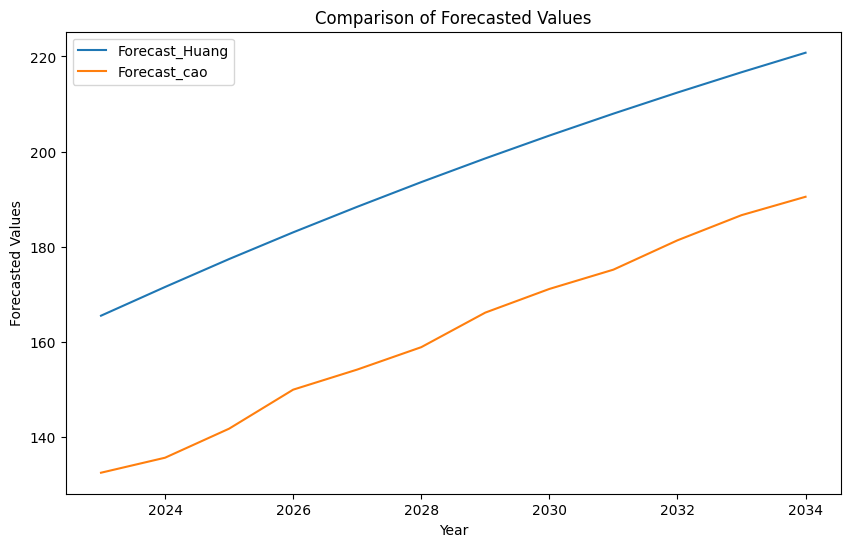

In [ ]:
import matplotlib.pyplot as plt

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Year'], merged_df['Forecast_Huang'], label='Forecast_Huang')
plt.plot(merged_df['Year'], merged_df['Forecast_cao'], label='Forecast_cao')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Forecasted Values')
plt.title('Comparison of Forecasted Values')
plt.legend()

# Show the plot
plt.show()


In [83]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [86]:
df1=pd.read_csv('/content/cement to co2.csv')


In [87]:
df1

Year     GCB    Cao     Guo       Huang
0   1959   12.68  10.21   15.16   14.876905
1   1960   13.84  11.14   16.53   16.223262
2   1961   14.72  11.84   17.61   17.257980
3   1962   15.87  12.75   18.99   18.606320
4   1963   16.87  13.55   20.19   19.757810
..   ...     ...    ...     ...         ...
58  2017  202.93    NaN  231.60  212.198095
59  2018  209.70    NaN  239.33  218.962675
60  2019  214.00    NaN  244.24  222.705199
61  2020  220.56    NaN     NaN  228.532414
62  2021  229.79    NaN     NaN  239.143572

[63 rows x 5 columns]

In [89]:
df.reset_index(inplace=True)


In [90]:
# Data preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = pd.DataFrame(scaler.fit_transform(df[['Year', 'Huang']]), columns=['Year', 'Huang'])


In [91]:


# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 1])
    return np.array(X), np.array(y)

In [92]:
sequence_length = 5  # You can adjust this based on your preference

X, y = create_sequences(df_scaled.values, sequence_length)

# Reshape input data to fit the LSTM model
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [93]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=100, batch_size=32)


Epoch 1/100
2/2 [==============================] - 5s 22ms/step - loss: 0.2244
Epoch 2/100
2/2 [==============================] - 0s 13ms/step - loss: 0.1858
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 0.1547
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 0.1229
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0958
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 0.0724
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0513
Epoch 8/100
2/2 [==============================] - 0s 13ms/step - loss: 0.0356
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0276
Epoch 10/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0294
Epoch 11/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0342
Epoch 12/100
2/2 [==============================] - 0s 13ms/step - loss: 0.0365
Epoch 13/100
2/2 [==============================]

In [98]:
# Make predictions for the next 28 years
future_years = np.arange(2022, 2050)  # Adjust the range based on your needs
future_data = pd.DataFrame({'Year': future_years, 'Huang': np.zeros(len(future_years))})  # Initialize 'Huang' with zeros

# Combine historical and future data for scaling
all_data = pd.concat([df[['Year', 'Huang']], future_data])

# Scale the combined data
scaled_all_data = scaler.transform(all_data)

# Separate the scaled historical and future data
scaled_historical_data = scaled_all_data[:len(df), :]
scaled_future_data = scaled_all_data[len(df):, :]





In [99]:
# Make predictions for the next 28 years
predicted_values = []

for i in range(len(future_years) - sequence_length + 1):
    predicted_value = model.predict(X_pred[i:i+1])
    scaled_future_data[i+sequence_length-1, 1] = predicted_value
    predicted_values.append(predicted_value)

# Inverse transform the predicted values
predicted_values = scaler.inverse_transform(np.hstack((scaled_future_data[sequence_length-1:, 0].reshape(-1, 1), np.array(predicted_values).reshape(-1, 1))))

# Display the predicted values for the next 28 years
predicted_df = pd.DataFrame({'Year': future_years[sequence_length-1:], 'Predicted_Huang': predicted_values[:, 1]})
print(predicted_df)

1/1 [==============================] - 0s 40ms/step
    Year  Predicted_Huang
0   2026       291.943021
1   2027       301.302241
2   2028       310.836466
3   2029       320.540857
4   2030       330.409988
5   2031       340.437868
6   2032       350.617949
7   2033       360.943200
8   2034       371.406027
9   2035       381.998437
10  2036       392.711821
11  2037       403.537357
12  2038       414.465368
13  2039       425.486602
14  2040       436.590660
15  2041       447.767409
16  2042       459.006317
17  2043       470.296769
18  2044       481.627831
19  2045       492.988622
20  2046       504.368074
21  2047       515.755493
22  2048       527.139811
23  2049       538.510440


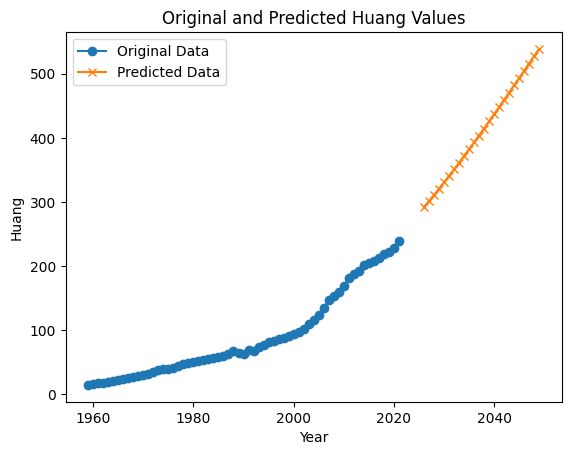

In [101]:
import matplotlib.pyplot as plt

# Plotting the original data
plt.plot(df['Year'], df['Huang'], label='Original Data', marker='o')

# Plotting the predicted values
plt.plot(predicted_df['Year'], predicted_df['Predicted_Huang'], label='Predicted Data', marker='x')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Huang')
plt.title('Original and Predicted Huang Values')
plt.legend()

# Show the plot
plt.show()


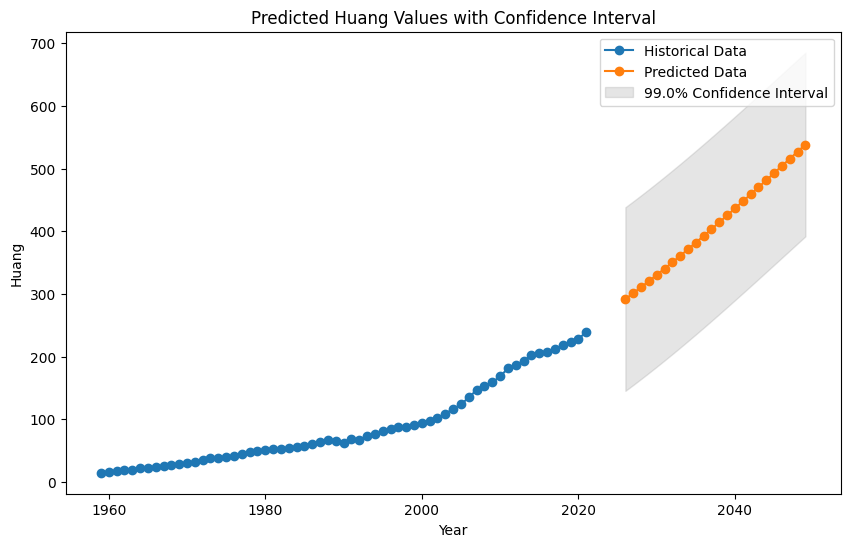

In [103]:
import matplotlib.pyplot as plt

# Extract the predicted values and years
predicted_values = predicted_df['Predicted_Huang'].values
years = predicted_df['Year'].values

# Calculate confidence intervals (assuming a simple approach)
confidence_interval = 0.99  # You can adjust this value based on your preference
std_dev = np.std(predicted_values)
margin_error = std_dev * 1.96  # 1.96 corresponds to a 95% confidence interval

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(df['Year'], df['Huang'], label='Historical Data', marker='o')
plt.plot(years, predicted_values, label='Predicted Data', marker='o')

# Confidence interval
plt.fill_between(years, predicted_values - margin_error, predicted_values + margin_error, color='gray', alpha=0.2, label=f'{confidence_interval * 100}% Confidence Interval')

plt.title('Predicted Huang Values with Confidence Interval')
plt.xlabel('Year')
plt.ylabel('Huang')
plt.legend()
plt.show()
